# DATASCIENCE INTERNSHIP

# TASK - 1

# Pooja Khabiya

# FAKE NEWS DECTECTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Importing the csv file

df = pd.read_csv("C:\\Users\\Pooja\\Downloads\\news\\news.csv")

In [3]:
# First 5 row of dataset
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
# last 5 row of dataset
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [5]:
# shape of the dataset
df.shape

(6335, 4)

In [7]:
# to check for duplicate values
df.duplicated().sum()

0

In [8]:
# Is there any null values is the dataset
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [9]:
# Removing the unnamed column
df=df.drop('Unnamed: 0',axis=1)

In [10]:
df.sample(5)

,title,text,label
4904,Is it 2016 already?,"Jan. 1, 2016, is 859 days away. But, judging f...",REAL
5025,BREAKING: Trump Voters in Critical Swing State...,"By Top Right News on November 8, 2016 in Uncat...",FAKE
4655,Zika: a masterpiece of public mind control,Zika: a masterpiece of public mind control \nS...,FAKE
225,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE
4852,POLL: Who will win Florida? - USAPoliticsNow,Comments \nDonald Trump has a 2 percentage poi...,FAKE


In [13]:
# Checking how many outputes do we have
l = df.label;
l.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [14]:
target=df.label.value_counts()
target

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [11]:
# Statistical description
df.describe()

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


In [12]:
# Deleting the title column as we want to work on title column
df=df.drop('title',axis=1)

In [16]:
df.sample(5)

,text,label
3604,"VIDEO : Black Professor, “Black Voters Are Bre...",FAKE
2487,Defense Secretary Ash Carter on Wednesday endo...,REAL
3114,British banker took 60g of cocaine while tortu...,FAKE
1507,"On Wednesday night, stories started pouring in...",REAL
1526,"By Jason Easley on Tue, Nov 1st, 2016 at 9:38 ...",FAKE


# DATA VISUALIZATION

In [13]:
#default theme
plt.style.use('ggplot')
sns.color_palette("tab10")
sns.set(context='notebook', style='darkgrid', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[20,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'
import warnings
warnings.filterwarnings('ignore')

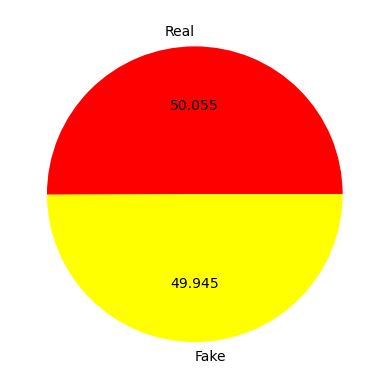

In [18]:
plt.pie(df['label'].value_counts(),labels=['Real','Fake'],colors=['red','yellow'],autopct='%0.3f')
plt.show()

Data is well distributed

In [20]:
# function to change the texts (title,text) machine understandable

import re

def convert(text):
    text = text.lower()
    text = re.sub(r'https?://S+|www\.\S+' , '' , text)
    text = re.sub('\n' , '' , text)
    text = re.sub('\[.*?\]', '', text)
    words = []
    for i in text:
        if i not in string.punctuation:
            words.append(i)
    return ''.join(words)

In [21]:
import string

df["text"] = df["text"].apply(convert)

In [22]:
df

,text,label
0,daniel greenfield a shillman journalism fellow...,FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,us secretary of state john f kerry said monday...,REAL
3,— kaydee king kaydeeking november 9 2016 the l...,FAKE
4,its primary day in new york and frontrunners h...,REAL
...,...,...
6330,the state department told the republican natio...,REAL
6331,the ‘p’ in pbs should stand for ‘plutocratic’ ...,FAKE
6332,antitrump protesters are tools of the oligarc...,FAKE
6333,addis ababa ethiopia —president obama convened...,REAL


# Making Data Ready for Model fitting

In [23]:
#to make the label neumerical from categorical

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])
df.sample(10)


,text,label
3251,as republicans jockey for their party’s top sp...,1
3725,posted by eddie a white house petition to remo...,0
546,in what amounts to the first pang of just ho...,0
6151,keywords pet care pet care tips having a pet ...,0
1417,did anthony weiner say these things as part a ...,0
2327,he has been roundly condemned for these statem...,1
3286,email in classical mythology the acheron is on...,0
6192,the obama administration on friday offered an ...,1
4662,while facing budget cuts the irs nevertheless ...,1
5053,takis magazine october 29 2016 palm beach fla—...,0


 1 = fake and 0= real

In [24]:
x=df['text']
y=df['label']

In [26]:
# Splitting into training and testing dataset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['label'], test_size=0.2, random_state=7)

In [27]:
x_train

6237    the head of a leading survivalist group has ma...
3722    ‹ › arnaldo rodgers is a trained and educated ...
5774    patty sanchez 51 used to eat 13000 calories a ...
336     but benjamin netanyahu’s reelection was regard...
3622    john kasich was killing it with these iowa vot...
                              ...                        
5699                                                     
2550    it’s not that americans won’t elect wealthy pr...
537     anyone writing sentences like ‘nevertheless fu...
1220    more catholics are in congress than ever befor...
4271    it was hosted by cnn and the presentation was ...
Name: text, Length: 5068, dtype: object

In [28]:
# To convert Text Data to vectors

from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train= vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

# Logistic Regression

In [29]:
# Using Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)
LogisticRegression()
pred_lr=LR.predict(x_test)
LR.score(x_test, y_test)

0.9187056037884768

We got an accuracy of 91.87% with this model.

# TESTING

In [30]:
def answer(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def test(n):
    test_n = {"text":[n]}
    new_def_test = pd.DataFrame(test_n)
    new_def_test["text"] = new_def_test["text"].apply(convert) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)

    return print("Prediction: {} ".format(answer(pred_LR[0])))

In [31]:
n="october    at   am  pretty factual except for women in the selective service  american military is still voluntary only and hasn t been a draft since vietnam war  the comment was made by a  star general of the army about drafting women and he said it to shut up liberal yahoos"
test(n) # original fake news


Prediction: Fake News 


In [32]:
n='shocking  michele obama   hillary caught glamorizing date rape promoters first lady claims moral high ground while befriending rape glorifying rappers infowars com   october    comments  alex jones breaks down the complete hypocrisy of michele obama and hillary clinton attacking trump for comments he made over a decade ago while the white house is hosting and promoting rappers who boast about date raping women and selling drugs in their music   rappers who have been welcomed to the white house by the obama s include  rick ross   who promotes drugging and raping woman in his song  u o n e o    while attacking trump as a sexual predator  michelle and hillary have further mainstreamed the degradation of women through their support of so called musicians who attempt to normalize rape  newsletter sign up get the latest breaking news   specials from alex jones and the infowars crew  related articles'
test(n) # original answer fake news

Prediction: Fake News 


# SAVING THE MODEL

In [33]:
import pickle

In [34]:
pickle.dump(LR,open('fake_news_detector.pkl','wb'))